In [1]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
from metropolis_hastings import *
from deciphering_utils import *
import sys  

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [2]:
filename = "warpeace_input.txt"
char_to_ix, ix_to_char, tr, fr = compute_statistics(filename)

filename_2 = "shakespeare_input.txt"
char_to_ix_2, ix_to_char_2, tr_2, fr_2 = compute_statistics(filename_2)

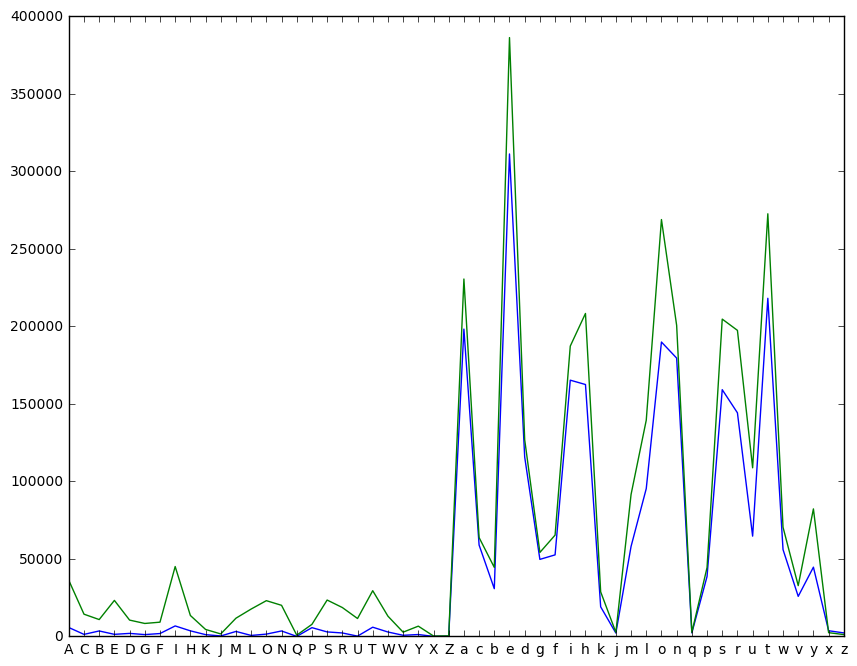

In [3]:
#plot the frequency statistics for characters
fr_stat = {}
fr_stat_2 = {}
chars = list('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ')
for c in chars:
    fr_stat[c] = fr[char_to_ix[c]]
    fr_stat_2[c] = fr_2[char_to_ix_2[c]]

plt.xticks(xrange(len(fr_stat)), fr_stat.keys())
plt.plot(xrange(len(fr_stat)), fr_stat.values())
plt.plot(xrange(len(fr_stat_2)), fr_stat_2.values())
plt.show()

#strong correlation shows that one of the texts can represent the other text.


In [12]:
#default text to work upon
t = list(open(filename, 'r').read()[100:200])

def pretty_print(text):
    print ''.join(text[1:200]),'...'

def test_scrambling_text_one_step(text):
    #generate an identity p_map
    p_map = generate_identity_p_map(char_to_ix.keys())
    #move the p_map one step
    p_map_n = move_one_step(p_map)
    
    scrambled_t = scramble_text(text, p_map_n)
    
    dict = {}
    for c1, c2 in zip(text, scrambled_t):
        if c1 != c2:
            dict[c1] = c2
            
    assert len(dict) <= 2
    
def test_log_probability_by_transition_counts():
    
    #take a really long text
    
    text = list(open(filename, 'r').read()[1:500000])
    p_map = generate_random_permutation_map(char_to_ix.keys())
    
    t1 = time.time()
    p1 = compute_log_probability(text, p_map, char_to_ix, fr, tr)
    t2 = time.time()
    del_t1 = t2-t1
    
    transtion_counts = compute_transition_counts(text, char_to_ix)
    
    t1 = time.time()
    p2 = compute_log_probability_by_counts(transtion_counts, text, p_map, char_to_ix, fr, tr)
    t2 = time.time()
    del_t2 = t2-t1
    
    print "%f times Speed up "%(del_t1/del_t2)
    print "p1 : ", p1, " p2 : ", p2 
    assert abs((p1-p2)) < 1e-5
    
test_scrambling_text_one_step(t)
test_log_probability_by_transition_counts()

2927.645349 times Speed up 
p1 :  -2958925.28876  p2 :  -2958925.28876


In [13]:
#prepare the sample
s = list(open(filename_2, 'r').read()[530:1000])

t = list(s)
p_map = generate_random_permutation_map(char_to_ix.keys())
p_map_reverse = {c: x for x, c in p_map.iteritems()}
scrambled_text = scramble_text(t, p_map)
p1 = compute_log_probability(scrambled_text, p_map, char_to_ix, fr, tr)
p2 = compute_log_probability(t, p_map, char_to_ix, fr, tr)

pretty_print(scrambled_text), pretty_print(t)
p1, p2



SkID IwDkMZTDl dwZrQTDd MY zMwuf ZQuTQgQ wd: Tr DkQl
zMwuf lTQuf wd GwD DkQ dwXQZruwTDl, zkTuQ TD zQZQ
zkMuQdMEQ, zQ ETHkD HwQdd DkQl ZQuTQgQf wd kwEIYQul;
GwD DkQl DkTYn zQ IZQ DMM fQIZ: DkQ uQIYYQ ...

What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanne ...


(-3101.3492496499589, -3062.8102172288186)

Entropy :  1499.32368176 , Error :  -1 , Acceptance :  0.336247478144 Current state : 
Ahot oathlsutv maspeutm ln wlard serueke am: up thev
wlard vuerd am Vat the mabesprautv, whure ut wese
whlremlce, we cufht faemm thev serueked am haconerv;
Vat thev thung we ose tll deos: the reonne...
Entropy :  1262.08977531 , Error :  -1 , Acceptance :  0.291205591147 Current state : 
That authomity sumfeits on wourd merieve us: if they
wourd yierd us but the supemfruity, whire it weme
whoresole, we licht cuess they merieved us hulanery;
but they think we ame too deam: the reanne...
Entropy :  1240.89586043 , Error :  -1 , Acceptance :  0.270709258257 Current state : 
That autholity sulfeits on wourd lerieve us: if they
wourd yierd us but the supelfruity, whire it wele
whoresome, we might guess they lerieved us humanery;
but they think we ale too deal: the reanne...
Entropy :  1227.83878286 , Error :  -1 , Acceptance :  0.2691065662 Current state : 
That authority surfeits on would relieve us: if 

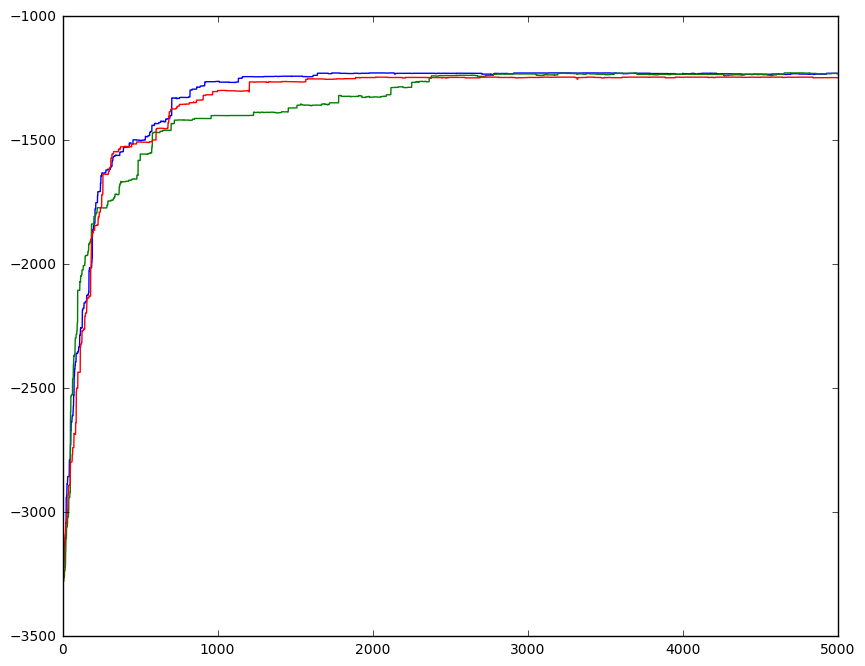

In [7]:
#time to run monte carlo
i = 0
initial_state = get_state(scrambled_text, tr, fr, char_to_ix)

while i < 3:
    state, lps, _ = metropolis_hastings(initial_state, propose_a_move, compute_probability_of_state, 
                                      iters=5000, print_every=500, tolerance=0.02, pretty_state=pretty_state)
    
    plt.plot(lps)
    i += 1

plt.show()